# GD with linear regression

Epoch 0, Loss: 0.3766
Epoch 100, Loss: 0.1415
Epoch 200, Loss: 0.1373
Epoch 300, Loss: 0.1371
Epoch 400, Loss: 0.1370
Epoch 500, Loss: 0.1370
Epoch 600, Loss: 0.1370
Epoch 700, Loss: 0.1370
Epoch 800, Loss: 0.1370
Epoch 900, Loss: 0.1370

Mean Squared Error on test set: 0.1664


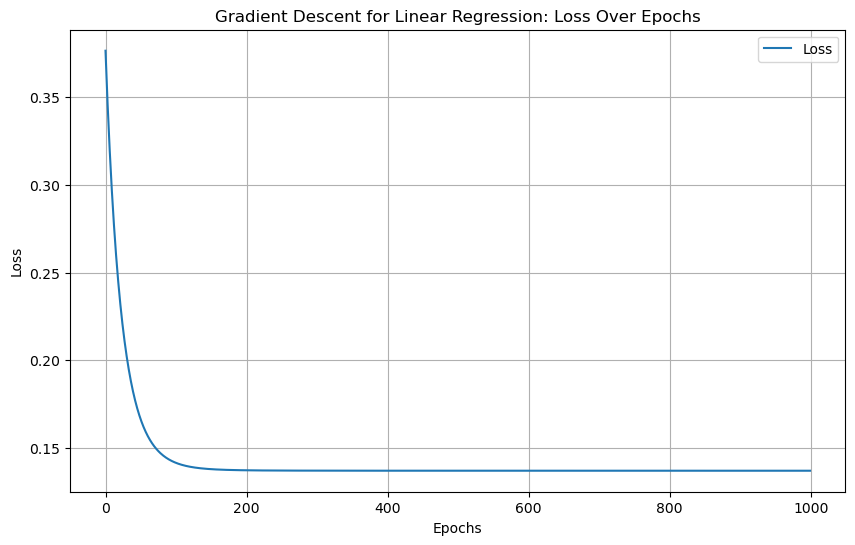

In [1]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Fill missing values in the Age column with the median value (to avoid NaNs)
    df['Age'].fillna(df['Age'].median(), inplace=True)
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Linear Regression using Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Initialize the Linear Regression model with gradient descent parameters.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.losses = []  # Store the loss over epochs

    def compute_loss(self, X, y):
        """
        Compute Mean Squared Error (MSE) loss.
        """
        m = len(y)
        predictions = np.dot(X, self.weights) + self.bias
        loss = (1/m) * np.sum((predictions - y)**2)
        return loss

    def fit(self, X, y):
        """
        Train the Linear Regression model using Gradient Descent.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Gradient Descent loop
        for epoch in range(self.epochs):
            m = len(y)
            predictions = np.dot(X, self.weights) + self.bias
            
            # Calculate the gradients
            dw = (2/m) * np.dot(X.T, (predictions - y))
            db = (2/m) * np.sum(predictions - y)
            
            # Update weights and bias using the gradients
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate and store the loss for monitoring
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict the target values for the given input data.
        """
        return np.dot(X, self.weights) + self.bias

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Linear Regression model using Gradient Descent and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LinearRegressionGD(learning_rate=0.01, epochs=1000)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE) on the test set
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nMean Squared Error on test set: {mse:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Gradient Descent for Linear Regression: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


 # SGD

Epoch 0, Loss: 0.4541
Epoch 100, Loss: 0.4253
Epoch 200, Loss: 0.4253
Epoch 300, Loss: 0.4253
Epoch 400, Loss: 0.4253
Epoch 500, Loss: 0.4253
Epoch 600, Loss: 0.4253
Epoch 700, Loss: 0.4253
Epoch 800, Loss: 0.4253
Epoch 900, Loss: 0.4253

Accuracy on test set: 0.7584


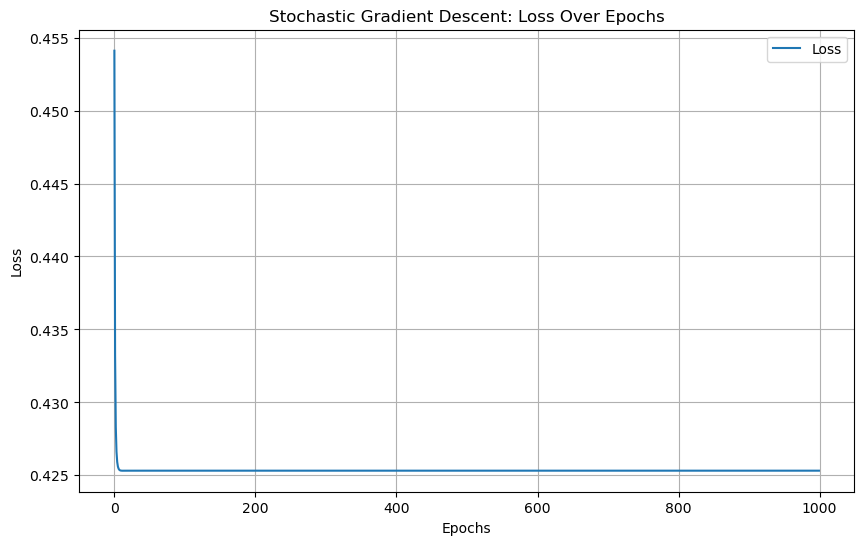

In [2]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression with Stochastic Gradient Descent
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Initialize the Logistic Regression model with hyperparameters.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.losses = []  # Store the loss over epochs

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant (1e-8) to avoid log(0)
        loss = log_loss(y, predictions)
        return loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using Stochastic Gradient Descent.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # SGD loop
        for epoch in range(self.epochs):
            # Step 1: Perform one update for each sample in the dataset
            for i in range(len(X)):
                xi = X[i:i+1]
                yi = y[i:i+1]
                
                # Compute predictions using the sigmoid function
                z = np.dot(xi, self.weights) + self.bias
                prediction = self.sigmoid(z)
                
                # Compute gradients for weights and bias
                error = prediction - yi
                dw = xi.T * error
                db = error
                
                # Step 2: Update weights and bias using the gradients
                self.weights -= self.learning_rate * dw.flatten()
                self.bias -= self.learning_rate * db

            # Step 3: Calculate and store the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)

            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using SGD and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegressionSGD(learning_rate=0.01, epochs=1000)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Stochastic Gradient Descent: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


# Logistic Regression using Batch Gradient Descent on Titanic Dataset

Epoch 0, Loss: 0.6918
Epoch 100, Loss: 0.5920
Epoch 200, Loss: 0.5380
Epoch 300, Loss: 0.5057
Epoch 400, Loss: 0.4850
Epoch 500, Loss: 0.4709
Epoch 600, Loss: 0.4610
Epoch 700, Loss: 0.4537
Epoch 800, Loss: 0.4483
Epoch 900, Loss: 0.4441

Accuracy on test set: 0.7303


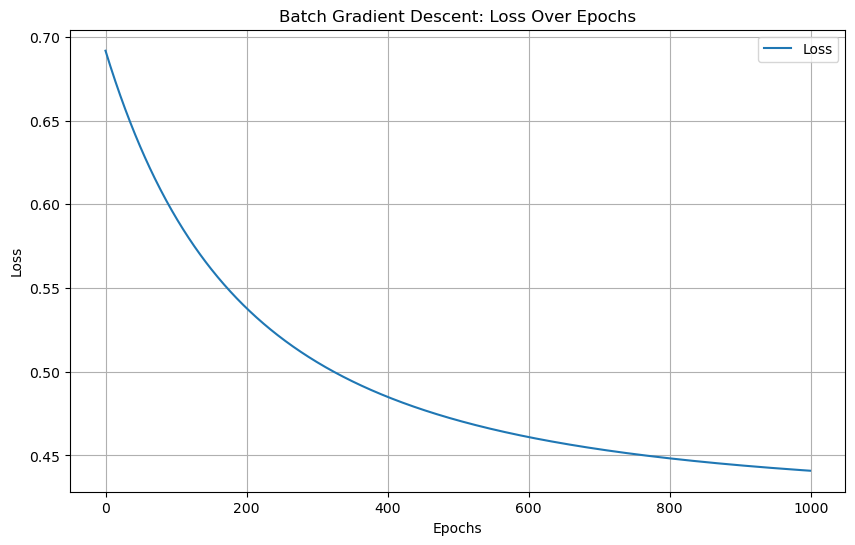

In [3]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression with Batch Gradient Descent
class LogisticRegressionBGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Initialize the Logistic Regression model with hyperparameters.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.losses = []  # Store the loss over epochs

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant (1e-8) to avoid log(0)
        loss = log_loss(y, predictions)
        return loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using Batch Gradient Descent.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Gradient Descent loop
        for epoch in range(self.epochs):
            # Step 1: Calculate predictions
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            
            # Step 2: Compute gradients
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)  # Gradient with respect to weights
            db = np.sum(error) / len(y)       # Gradient with respect to bias
            
            # Step 3: Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Step 4: Calculate and store the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using Batch Gradient Descent and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegressionBGD(learning_rate=0.01, epochs=1000)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Batch Gradient Descent: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


# Combined result

Training with Gradient Descent:
Epoch 0, Loss: 0.6918
Epoch 100, Loss: 0.5920
Epoch 200, Loss: 0.5380
Epoch 300, Loss: 0.5057
Epoch 400, Loss: 0.4850
Epoch 500, Loss: 0.4709
Epoch 600, Loss: 0.4610
Epoch 700, Loss: 0.4537
Epoch 800, Loss: 0.4483
Epoch 900, Loss: 0.4441

Training with Momentum-based Gradient Descent:
Epoch 0, Loss: 0.6930
Epoch 100, Loss: 0.5968
Epoch 200, Loss: 0.5397
Epoch 300, Loss: 0.5063
Epoch 400, Loss: 0.4851
Epoch 500, Loss: 0.4709
Epoch 600, Loss: 0.4608
Epoch 700, Loss: 0.4535
Epoch 800, Loss: 0.4481
Epoch 900, Loss: 0.4439

Accuracy of Gradient Descent model on test set: 0.7303
Accuracy of Momentum model on test set: 0.7303


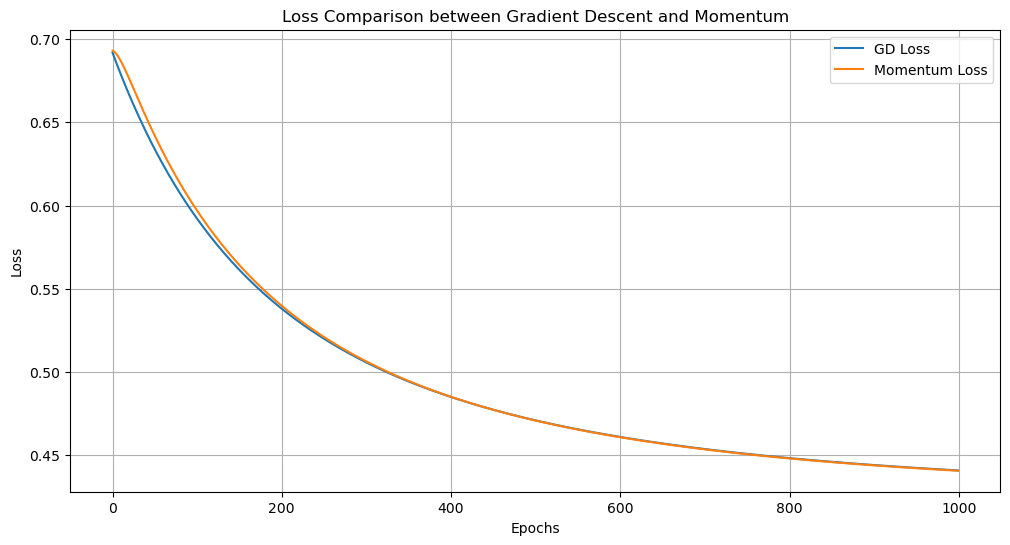

In [4]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Logistic Regression Class with Gradient Descent (and variants)
class LogisticRegressionOptimizer:
    def __init__(self, learning_rate=0.01, epochs=1000, beta=0.9, method='GD'):
        """
        Initialize the Logistic Regression model with hyperparameters.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        - beta: The momentum coefficient (for Momentum).
        - method: The optimization method ('GD' or 'Momentum').
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = beta
        self.method = method
        self.losses = []  # Store the loss over epochs

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant (1e-8) to avoid log(0)
        loss = log_loss(y, predictions)
        return loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using Gradient Descent (with Momentum if specified).
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights, bias, and momentum-related variables
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        v_w = np.zeros(X.shape[1])  # Velocity for weights (Momentum)
        v_b = 0  # Velocity for bias (Momentum)
        
        # Gradient Descent loop (or Momentum if specified)
        for epoch in range(self.epochs):
            # Calculate predictions and gradients
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)
            db = np.sum(error) / len(y)
            
            # Momentum Update (if using Momentum)
            if self.method == 'Momentum':
                v_w = self.beta * v_w + (1 - self.beta) * dw
                v_b = self.beta * v_b + (1 - self.beta) * db
                self.weights -= self.learning_rate * v_w
                self.bias -= self.learning_rate * v_b
            else:  # Standard Gradient Descent
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            # Calculate and store the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 2: Train and evaluate both Gradient Descent and Momentum-based models
def train_and_evaluate():
    """
    Train the Logistic Regression model using both Standard GD and Momentum,
    and evaluate their performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize both GD and Momentum models
    gd_model = LogisticRegressionOptimizer(learning_rate=0.01, epochs=1000, method='GD')
    momentum_model = LogisticRegressionOptimizer(learning_rate=0.01, epochs=1000, method='Momentum')
    
    # Train both models
    print("Training with Gradient Descent:")
    gd_model.fit(X_train, y_train)
    
    print("\nTraining with Momentum-based Gradient Descent:")
    momentum_model.fit(X_train, y_train)
    
    # Evaluate the models on the test set
    gd_pred = gd_model.predict(X_test)
    momentum_pred = momentum_model.predict(X_test)
    
    gd_accuracy = accuracy_score(y_test, gd_pred)
    momentum_accuracy = accuracy_score(y_test, momentum_pred)
    
    print(f"\nAccuracy of Gradient Descent model on test set: {gd_accuracy:.4f}")
    print(f"Accuracy of Momentum model on test set: {momentum_accuracy:.4f}")
    
    # Plot the loss curves
    plt.figure(figsize=(12, 6))
    plt.plot(gd_model.losses, label='GD Loss')
    plt.plot(momentum_model.losses, label='Momentum Loss')
    plt.title("Loss Comparison between Gradient Descent and Momentum")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 3: Run the training and evaluation function
train_and_evaluate()


# SGD_GD_BatchGD 

Epoch 0, Loss: 0.6918
Epoch 100, Loss: 0.5920
Epoch 200, Loss: 0.5380
Epoch 300, Loss: 0.5057
Epoch 400, Loss: 0.4850
Epoch 500, Loss: 0.4709
Epoch 600, Loss: 0.4610
Epoch 700, Loss: 0.4537
Epoch 800, Loss: 0.4483
Epoch 900, Loss: 0.4441

Accuracy on test set with batch GD: 0.7303


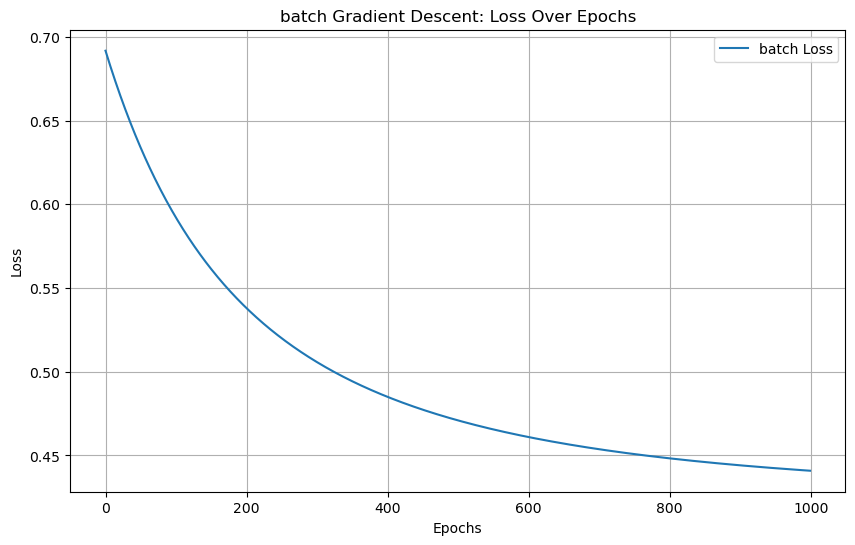


Accuracy on test set with sgd GD: 0.7584


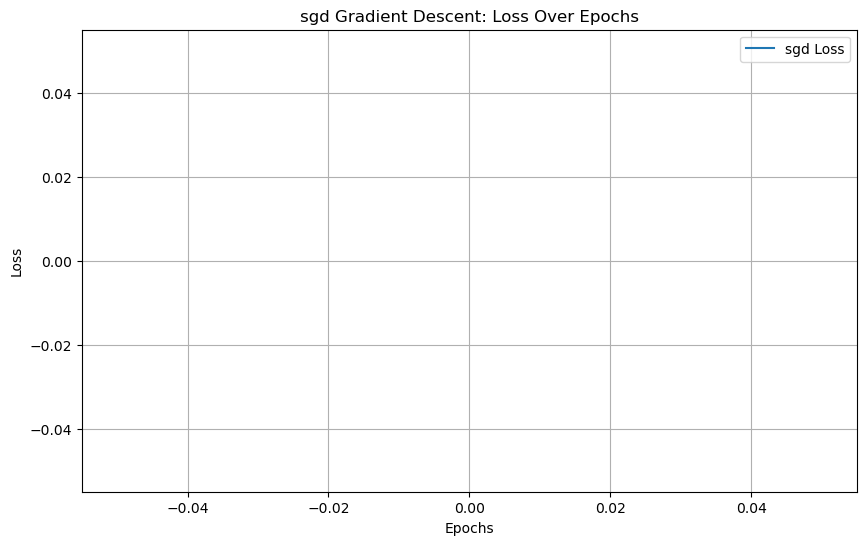

Epoch 0, Loss: 0.6932
Epoch 100, Loss: 0.6932
Epoch 200, Loss: 0.6920
Epoch 300, Loss: 0.6899
Epoch 400, Loss: 0.6871
Epoch 500, Loss: 0.6839
Epoch 600, Loss: 0.6806
Epoch 700, Loss: 0.6773
Epoch 800, Loss: 0.6741
Epoch 900, Loss: 0.6710

Accuracy on test set with mini-batch GD: 0.7079


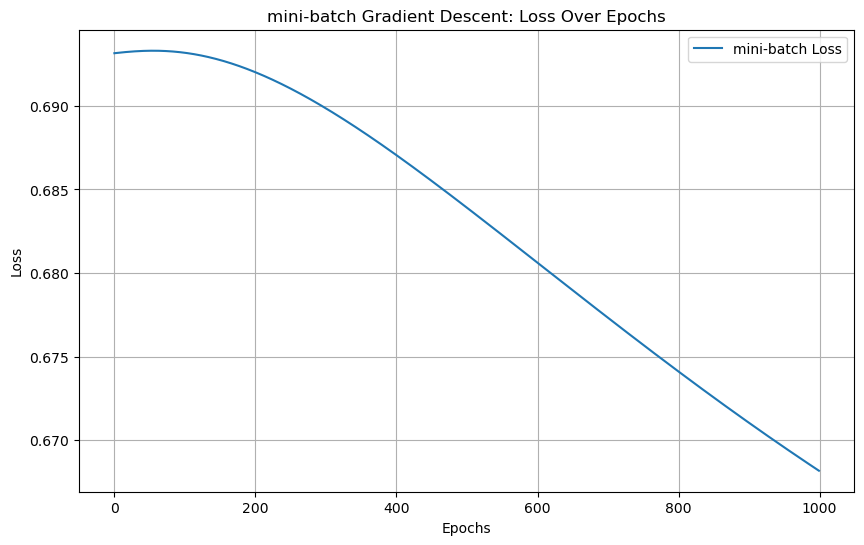

In [5]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    df = pd.read_csv('titanic.csv')
    df.drop(columns=['Name'], inplace=True)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression using different Gradient Descent techniques
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000, batch_size=None, method='batch'):
        """
        Initialize Logistic Regression with Gradient Descent methods.
        - learning_rate: Learning rate for updates.
        - epochs: Number of iterations over the dataset.
        - batch_size: If None, uses full-batch GD, else specifies mini-batch size.
        - method: Can be 'batch', 'sgd', or 'mini-batch'.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.method = method
        self.losses = []  # List to store the loss values

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant (1e-8) to avoid log(0)
        loss = log_loss(y, predictions)
        return loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using selected GD method (Batch, SGD, Mini-Batch).
        """
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for epoch in range(self.epochs):
            if self.method == 'batch':
                # Full Batch Gradient Descent
                z = np.dot(X, self.weights) + self.bias
                predictions = self.sigmoid(z)
                error = predictions - y
                dw = np.dot(X.T, error) / len(y)
                db = np.sum(error) / len(y)
            elif self.method == 'sgd':
                # Stochastic Gradient Descent (one data point at a time)
                for i in range(len(y)):
                    xi = X[i:i+1]  # Single sample
                    yi = y[i:i+1]
                    z = np.dot(xi, self.weights) + self.bias
                    prediction = self.sigmoid(z)
                    error = prediction - yi
                    dw = xi.T.dot(error)
                    db = np.sum(error)
                    self.weights -= self.learning_rate * dw
                    self.bias -= self.learning_rate * db
                continue  # Skip batch loss calculation for SGD
            elif self.method == 'mini-batch':
                # Mini-Batch Gradient Descent (batch of data)
                for i in range(0, len(y), self.batch_size):
                    X_batch = X[i:i + self.batch_size]
                    y_batch = y[i:i + self.batch_size]
                    z = np.dot(X_batch, self.weights) + self.bias
                    predictions = self.sigmoid(z)
                    error = predictions - y_batch
                    dw = np.dot(X_batch.T, error) / self.batch_size
                    db = np.sum(error) / self.batch_size

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate and store the loss after every epoch
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print loss for every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate(method='batch', batch_size=None):
    """
    Train the Logistic Regression model using different gradient descent methods and evaluate performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegressionGD(learning_rate=0.01, epochs=1000, batch_size=batch_size, method=method)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set with {method} GD: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label=f'{method} Loss')
    plt.title(f"{method} Gradient Descent: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation for each method
methods = ['batch', 'sgd', 'mini-batch']
batch_size = 32  # Define batch size for mini-batch GD

for method in methods:
    train_and_evaluate(method=method, batch_size=batch_size if method == 'mini-batch' else None)
